# The Perceptron Algorithm

A Perceptron is a system that learns using labeled examples of feature vectors, mapping these inputs to their corresponding output class labels. In its simplest form, a Perceptron contains N input nodes, one for each entry in the input row, followed by only one layer in the network with just a single node in that layer.

Training a Perceptron is a fairly straightforward operation. Our goal is to obtain a set of weights *w* that accurately classifies each instance in our training set. In order to train our Perceptron, we iteratively feed the network our training data multiple times. Each time the network has seen the full set of training data, we say an epoch has passed. It normally takes many epochs until a weight vector _w_ can be learned to linearly separate our two classes of data.

![Perceptron](https://drive.google.com/uc?id=1K7olbB11mSfAwPmB8BeeRNe6XbuGSK4D)

The pseudocode is the following:
1. Initialize our weight vector w with small random values
2. Until Perceptron converges
    1. Loop over each input and class label
    2. Take $x$ and pass it through the network, calculating the output value: $y = (w · x)$
    3. Update the weights: if ŷ = 0 --> $w_i = w_i + \alpha x_i$, if ŷ = 1 --> $w_i = w_i - \alpha x_i$
        

In [119]:
import random, math
import numpy as np
import matplotlib.pyplot as plt

In [120]:
class Perceptron:        
    """Perceptron class

        Args:
            M: Number of inputs
            alpha: Learning rate
        
        Attributes:
            W: The weights for the perceptron
            b: bias
            alpha: The learning rate
    """
    def __init__(self, N,M, alpha=0.1):        
        # Creates an array of N weights and initializes with random values
        # define iputs

        arregloW=2
        arregloB=1
        arrW=[0]*arregloW
        arrB=[0]*arregloB
        for i in range(arregloW):
            arrW[i]=random.uniform(0, 1)
        for i in range(arregloB):
            arrB[i]=random.uniform(0,1)


        self.M=M
        self.W = (np.random.random(N))
        self.b = (np.random.random(1))
        #self.W = arrW
        #self.b = arrB
        self.alpha=alpha

        print("Imprimiendo random np")
        print(self.W)
        print(self.b)
      
        print("<--------------------------------------------------------------------->")
        print("Imprimienndo bios")
        print(self.b)
        print("Imprimiendo weights")
        print(self.W)
        print("<--------------------------------------------------------------------->")
            
    def sigmoid(self, x):
        #TO DO: Apply the sigmoid function
        s=1/(1+np.exp(-x))
        return s

    def error(self, y, yhat):
        #TO DO: Apply the sigmoid function
        #e=(1-y)*(np.log(1-yhat)+y*(np.log(yhat)))
        e=(1-y)*(np.log(1-yhat))+y*(np.log(yhat))
        return e
    
    def predict(self, x):
        """
            Makes a prediction for the specified input
            
            Args:
                x: Input to make a prediction on.
        """        
        #TO DO: Define the predict function
        #y_hat=[0]*self.M
        #y_hat=0
        #print(x)
        # for i in range(self.M):
        #y_hat=self.sigmoid(self.W[0]*x[0]+self.W[1]*x[1]+self.b[0])
        y_hat=self.sigmoid(self.W[0]*x[0]+self.W[1]*x[1]+self.b[0])
        #print("Imprimiendo matriz Y Sombrero")
        #print(y_hat)
        return y_hat
    
    def perceptronStep(self, X, y):
        """
            The perceptron basic step. It updates the weights based on the input data.
            
            Args:
                X: Array with the input data
                y: Data labels
        """
        # TO DO: Implement the perceptron algorithm.
        pass
    
    def train(self, X, y, epochs = 10):
        """
            Runs the perceptron step a specified number of epochs
            
            Args:
                X: input data
                y: labels
                epochs: The number of times the step is executed
        """
        # loop over the desired epochs
        
        self.epochs=epochs
        dW1=0
        dW2=0
        dbias=0
        y_hat=[0]*self.M
        errorLista=list()
        e1=0
        for epoch in range(epochs):
            #print("Before")
            e=0
            #print(e)
            for i in range(self.M):
                yhat=self.predict(X[i])
                #print("error before")
                #print(e)
                #e+=self.error(yhat, y[i])
                e+=self.error(y[i],yhat)
                #print("error after")
                #print(e)
                dy=yhat-y[i]
                dW1+=dy*X[i][0]
                dW2+=dy*X[i][1]
                dbias+=dy
                y_hat[i]=yhat
            self.W[0]+=(-dW1/self.M)*self.alpha
            self.W[1]+=(-dW2/self.M)*self.alpha
            self.b+=(-dbias/self.M)*self.alpha
            #e*=(-1/self.M)
            #print(self.M)
            e1=(-1/self.M)*e
            errorLista.append(e1)
           
        print(errorLista)  
        print("Imprimiendo lista calculo y_hat")
        print(y_hat)
        #print("Graficas")
        plt.plot(errorLista)
        
        return
                

Entrenando Perceptron con OR

Entrenando perceptron con OR
Imprimiendo random np
[0.95620091 0.11283576]
[0.20932933]
<--------------------------------------------------------------------->
Imprimienndo bios
[0.20932933]
Imprimiendo weights
[0.95620091 0.11283576]
<--------------------------------------------------------------------->
Initial weights OR [0.95620091 0.11283576]
<--------------------------------------------------------------------->
[0.4663277180428057, 0.4618878011850493, 0.45343139494743745, 0.4417318027169459, 0.42778169381955466, 0.41263507999645316, 0.3972564935324295, 0.3824073837995949, 0.36858645854315547, 0.3560242465029201, 0.3447191222814287, 0.3344963035354362, 0.32507261368740276, 0.3161150834993796, 0.3072874554272103, 0.29828331980246203, 0.2888473448329795, 0.27878714833614127, 0.2679783865037459, 0.25636514248344, 0.2439570525389697, 0.23082401567080596, 0.21708889079175556, 0.20291833151125394, 0.1885118497606628, 0.1740893215340671, 0.15987740944796378, 0.14609570150645818, 0.13294

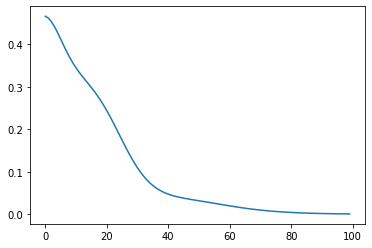

In [121]:
# change the seed to see different solutions
random.seed(42)

# The following data is used to train the perceptron for the AND operation
# Test your code with the OR operation

print("Entrenando perceptron con OR")
pOR = Perceptron(2,4)
X = [[0,0],[0,1], [1,0], [1,1]]
y = [0,1, 1, 1]
print(f"Initial weights OR {pOR.W}")
print("<--------------------------------------------------------------------->")
pOR.train(X, y, 100)
print("<--------------------------------------------------------------------->")
print(f"Weights after training OR {pOR.W}")
print("<--------------------------------------------------------------------->")
print("Resultados OR")
prediction1 = pOR.predict([0,0]) #Octavio
prediction2 = pOR.predict([0,1]) #Octavio
prediction3 = pOR.predict([1,0]) #Octavio
prediction4 = pOR.predict([1,1]) #Octavio
print(prediction1, prediction2, prediction3, prediction4)
print("<--------------------------------------------------------------------->")



Entrando perceptron con AND

*************************************************************************
Entrenando perceptron con AND
Imprimiendo random np
[0.61218113 0.86545751]
[0.18594753]
<--------------------------------------------------------------------->
Imprimienndo bios
[0.18594753]
Imprimiendo weights
[0.61218113 0.86545751]
<--------------------------------------------------------------------->
Initial weights AND [0.61218113 0.86545751]
<--------------------------------------------------------------------->
[0.8712110425955955, 0.8470235486550014, 0.8013305744241984, 0.7394764448200634, 0.6692579657095469, 0.600206897652125, 0.5420585785396101, 0.5025076645756927, 0.48512410370262543, 0.4886742252707191, 0.5082639782511641, 0.5374026071311064, 0.569757425362594, 0.6000675797688916, 0.6243661746802635, 0.6398546117561692, 0.6446806947549826, 0.6377431564853905, 0.6185669231935291, 0.5872618035984514, 0.5445704724244871, 0.49201090630867456, 0.4321039229868699, 0.3686171950858654, 0.3066208854886522, 0

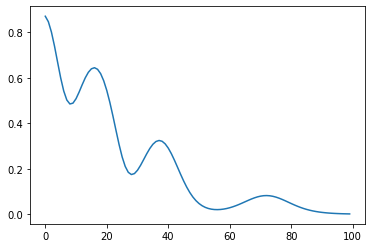

In [122]:
print("*************************************************************************")
print("Entrenando perceptron con AND")
pAND = Perceptron(2,4)
y1 = [0,0, 0, 1]
print(f"Initial weights AND {pAND.W}")
print("<--------------------------------------------------------------------->")
pAND.train(X, y1, 100)
print("<--------------------------------------------------------------------->")
print(f"Weights after training AND {pAND.W}")
print("<--------------------------------------------------------------------->")
print("Resultados AND")
prediction1 = pAND.predict([0,0]) #Octavio
prediction2 = pAND.predict([0,1]) #Octavio
prediction3 = pAND.predict([1,0]) #Octavio
prediction4 = pAND.predict([1,1]) #Octavio
print(prediction1, prediction2, prediction3, prediction4)
print("<--------------------------------------------------------------------->")
# print(prediction)
# prediction = p.predict([0,1]) #Octavio
# print(prediction)
# Test training with different epochs